In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import pareto
import design_space_utils as utils

In [2]:
platform = 'de1'
version = '16.1'
benchmark = 'fr1_desk_100'

depth_fusion = utils.read_design_space(platform, version, benchmark, 'depth_fusion_fpga')
raycasting = utils.read_design_space(platform, version, benchmark, 'raycasting_fpga')
combined = utils.read_design_space(platform, version, benchmark, 'combined_fpga')
icp = utils.read_design_space(platform, version, benchmark, 'icp_fpga')
baseline_cpu = utils.read_design_space(platform, version, benchmark, 'baseline_cpu')
baseline_x86 = utils.read_design_space('de5', version, 'fr1_desk_200', 'baseline_cpu')

In [3]:

def plot_ds(dfs, xkey='FPS', ykey='logic_utilization_percent',
            colors=None, markers=None, labels=None,
            xlabel='Throughput (Hz)',
            ylabel='Logic Utilization (%)',
            pareto_line=False,
            ax=None):
    if ax is None: ax = plt.gca()
    all_data = np.empty((0,2))
    for i,df in enumerate(dfs):
        x = df[xkey]
        y = df[ykey]
        color = None if colors is None else colors[i]
        marker = None if markers is None else markers[i]
        label = None if labels is None else labels[i]
        ax.scatter(x, y, c=color, marker=marker, edgecolors='#222222', label=label)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        all_data = np.vstack((all_data, np.c_[x,-y]))
    if pareto_line:
        pareto_solutions, pareto_idx = pareto.prpt(all_data)
        pareto_solutions = pareto_solutions[pareto_solutions[:,0].argsort()]
        ax.plot(pareto_solutions[:,0], -pareto_solutions[:,1], c='#222222', linestyle='dashed', label='Pareto designs')
    if labels is not None: ax.legend()
    return ax

def plot1(dfs, colors=None, markers=None, labels=None, fps='FPS', ax=None):
    pareto_line = True if fps == 'Total FPS' else False
    return plot_ds(dfs, fps, 'logic_utilization_percent', colors, markers, labels, 'Throughput (Hz)', 'Logic Utilization (%)', pareto_line, ax)

def plot2(dfs, colors=None, markers=None, labels=None, fps='FPS', ax=None):
    pareto_line = True if fps == 'Total FPS' else False
    return plot_ds(dfs, fps, 'ate_cm', colors, markers, labels, 'Throughput (Hz)', 'ATE (cm)', pareto_line, ax)

# plt.ylim(z.min() * 0.999, z.max()*1.001)

labels = ['Depth Fusion', 'Raycasting', 'Combined', 'ICP', 'Baseline CPU']
colors = ['#599ad3', '#f9a65a', '#9e66ab', '#3e9651', '#636363', '#FFFFFF']
markers = ['o', 's', '^', 'x', '*', 'h']



<IPython.core.display.Javascript object>


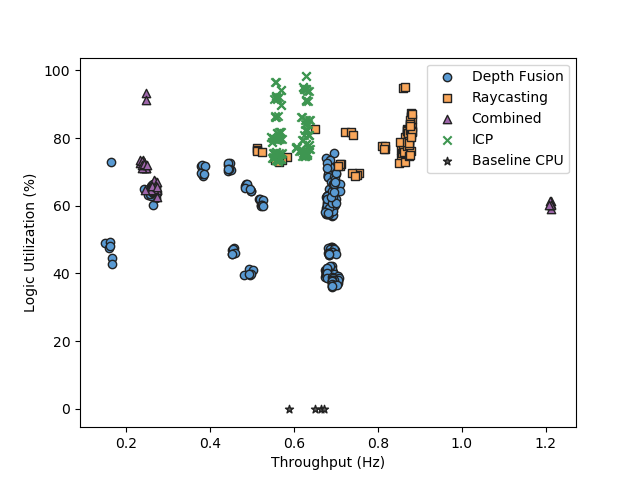

<IPython.core.display.Javascript object>


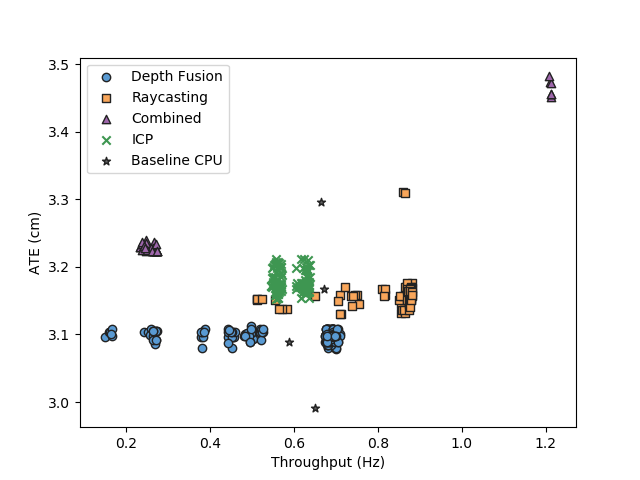

In [4]:
dfs = [depth_fusion, raycasting, combined, icp, baseline_cpu]
plot1(dfs, colors, markers, labels)
plt.figure()
plot2(dfs, colors, markers, labels)

plt.show()

<IPython.core.display.Javascript object>


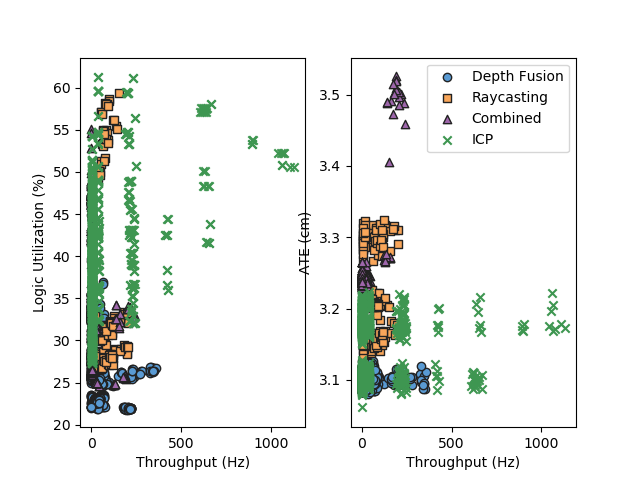

<IPython.core.display.Javascript object>


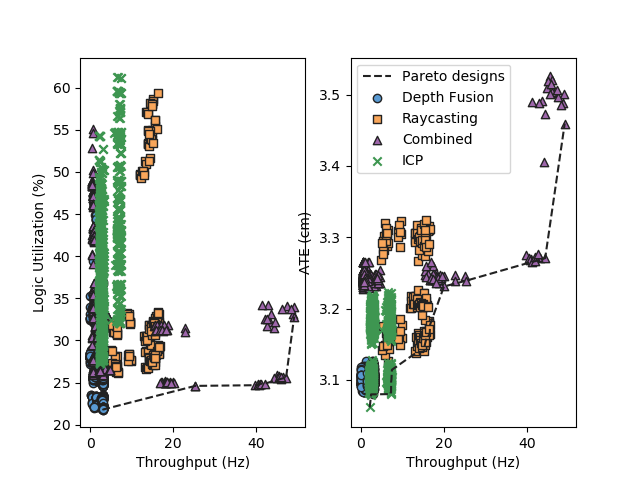

In [5]:
platform = 'de5'
benchmark = 'fr1_desk_200'

depth_fusion = utils.read_design_space(platform, version, benchmark, 'depth_fusion_fpga', 'Fusion_integrate_Kernel')
raycasting = utils.read_design_space(platform, version, benchmark, 'raycasting_fpga', 'Raycast_CreateICPMaps_Kernel')
combined = utils.read_design_space(platform, version, benchmark, 'combined_fpga', 'Fusion_integrate_Kernel')
icp = utils.read_design_space(platform, version, benchmark, 'icp_fpga', 'Tracking1_Kernel')

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plot1([depth_fusion, raycasting, combined, icp], colors=colors, markers=markers, labels=None, ax=ax1)
plot2([depth_fusion, raycasting, combined, icp], colors=colors, markers=markers, labels=labels, ax=ax2)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plot1([depth_fusion, raycasting, combined, icp], colors=colors, markers=markers, labels=None, fps='Total FPS', ax=ax1)
plot2([depth_fusion, raycasting, combined, icp], colors=colors, markers=markers, labels=labels, fps='Total FPS', ax=ax2)

In [12]:
sum(map(len, [depth_fusion, raycasting, combined, icp]))

2645